In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("mushrooms.csv")

In [11]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
df.shape

(8124, 23)

In [13]:
#df=pd.get_dummies(df)

In [14]:
#df.head()

In [15]:
#df.shape

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
for col in df:
    df[col]=le.fit_transform(df[col])


In [20]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [34]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [35]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [25]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
x

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9535182803600956

In [38]:
pred=lr.predict(x_test)

In [39]:
accuracy_score(y_test,pred)

0.9477806788511749

In [40]:
confusion_matrix(y_test,pred)

array([[1314,   64],
       [  76, 1227]], dtype=int64)

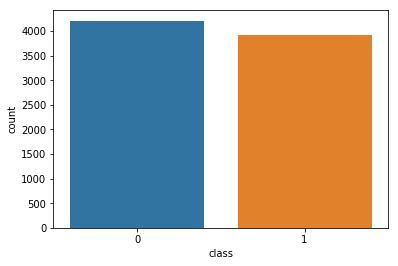

In [44]:
sns.countplot("class",data=df)

In [45]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)

In [46]:
kmeans.fit_predict(x)

array([0, 0, 0, ..., 0, 1, 0])

In [59]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [48]:
auc=roc_auc_score(y_test,pred)

In [49]:
auc

0.9476144701242082

In [50]:
fpr,tpr,threshold=roc_curve(y_test,pred)

In [51]:
print(fpr)
print(tpr)
print(threshold)

[0.         0.04644412 1.        ]
[0.         0.94167306 1.        ]
[2 1 0]


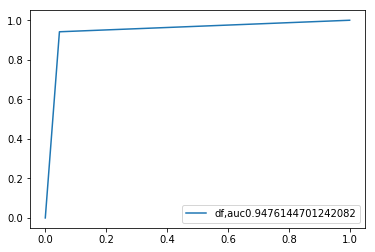

In [57]:
plt.plot(fpr,tpr,label="df,auc"+str(auc))
plt.legend(loc="best")
plt.show()

In [69]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train, y_train)
gnbpred = gnb.predict(x_test)

In [70]:
print('\nAccuracy Score\n\n',accuracy_score(y_test,gnbpred))
print("\nConfusion Matrix\n\n",confusion_matrix(y_test,gnbpred))
print("\nClassification Report\n\n",classification_report(y_test,gnbpred))


Accuracy Score

 0.9216710182767625

Confusion Matrix

 [[1264  114]
 [  96 1207]]

Classification Report

               precision    recall  f1-score   support

           0       0.93      0.92      0.92      1378
           1       0.91      0.93      0.92      1303

   micro avg       0.92      0.92      0.92      2681
   macro avg       0.92      0.92      0.92      2681
weighted avg       0.92      0.92      0.92      2681



In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc=RandomForestClassifier()

In [71]:
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

1.0

In [73]:
rfcpred=rfc.predict(x_test)

In [74]:
print('\nAccuracy Score\n\n',accuracy_score(y_test,rfcpred))
print("\nConfusion Matrix\n\n",confusion_matrix(y_test,rfcpred))
print("\nClassification Report\n\n",classification_report(y_test,rfcpred))


Accuracy Score

 1.0

Confusion Matrix

 [[1378    0]
 [   0 1303]]

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1378
           1       1.00      1.00      1.00      1303

   micro avg       1.00      1.00      1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [75]:
import pickle

In [76]:
smod=pickle.dumps(rfc)
lmod=pickle.loads(smod)
lmod.predict(x_test)

array([1, 1, 0, ..., 1, 1, 1])

In [77]:
from sklearn.externals import joblib

In [79]:
joblib.dump(rfc,"smodx")
lmodx=joblib.load("smodx")
lmodx.predict(x_test)

array([1, 1, 0, ..., 1, 1, 1])

In [82]:
classout=pd.Series(rfc.feature_importances_,index=x.columns)

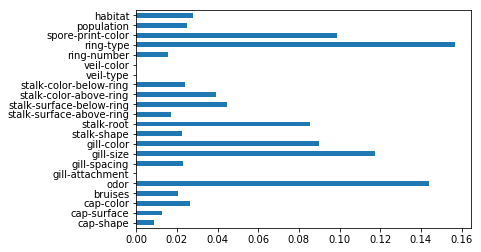

In [86]:
classout.plot(kind="barh")

In [87]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
5,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
6,0,2,8,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,2,3
7,0,3,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,3,3
8,5,3,8,1,6,1,0,1,7,0,...,2,7,7,0,2,1,4,2,4,1
9,0,2,9,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,3,3
